## Semantic Segmentation

Semantic segmentation, which is a pixel-level labeling for image classification, is an important technique for the scene understanding. Because each pixel is labeled as belonging to a given semantic class. 

Autonomous driving will be one of the revolutionary technologies in the near future in terms of the impact on the lives of people living in industrially developed
countries. An autonomous vehicle must sense its surroundings and act safely to reach a certain target. Such functionality is carried out by using several types of classifiers. 

In a typical task of scene understanding, the classes could be road, street, traffic signs, street markings, cars, pedestrians, sidewalks, trees. 


### In this notebook, we are implementing U-net model which can detect capture the semantic information and differentiate between different objects around in the scene. 

In [43]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Dataset link

https://drive.google.com/file/d/1GT3k4nPHLmU6AbQldYhw0c2rTOxAgNUW

In [0]:
import os
os.chdir('/content/drive/My Drive/AIML Notes/Segmentation/')
path = '.'

In [45]:
ls

data_semantics.zip  model.h5  model.json  testing/  training/


In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/AIML Notes/Segmentation/data_semantics.zip','r') as z:
    z.extractall()

In [47]:
pwd

'/content/drive/My Drive/AIML Notes/Segmentation'

In [0]:
project_path = "/content/drive/My Drive/AIML Notes/Segmentation/"

In [0]:
#Image Settings -

IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128


In [0]:
#Getting the image list 

original  = os.listdir('./training/image_2')

In [51]:
print(original)

['000000_10.png', '000001_10.png', '000002_10.png', '000003_10.png', '000004_10.png', '000005_10.png', '000006_10.png', '000007_10.png', '000008_10.png', '000009_10.png', '000010_10.png', '000011_10.png', '000012_10.png', '000013_10.png', '000014_10.png', '000015_10.png', '000016_10.png', '000017_10.png', '000018_10.png', '000019_10.png', '000020_10.png', '000021_10.png', '000022_10.png', '000023_10.png', '000024_10.png', '000025_10.png', '000026_10.png', '000027_10.png', '000028_10.png', '000029_10.png', '000030_10.png', '000031_10.png', '000032_10.png', '000033_10.png', '000034_10.png', '000035_10.png', '000036_10.png', '000037_10.png', '000038_10.png', '000039_10.png', '000040_10.png', '000041_10.png', '000042_10.png', '000043_10.png', '000044_10.png', '000045_10.png', '000046_10.png', '000047_10.png', '000048_10.png', '000049_10.png', '000050_10.png', '000051_10.png', '000052_10.png', '000053_10.png', '000054_10.png', '000055_10.png', '000056_10.png', '000057_10.png', '000058_10.pn

In [0]:
masks  = os.listdir('./training/semantic')

In [53]:
print(masks)

['000000_10.png', '000001_10.png', '000002_10.png', '000003_10.png', '000004_10.png', '000005_10.png', '000006_10.png', '000007_10.png', '000008_10.png', '000009_10.png', '000010_10.png', '000011_10.png', '000012_10.png', '000013_10.png', '000014_10.png', '000015_10.png', '000016_10.png', '000017_10.png', '000018_10.png', '000019_10.png', '000020_10.png', '000021_10.png', '000022_10.png', '000023_10.png', '000024_10.png', '000025_10.png', '000026_10.png', '000027_10.png', '000028_10.png', '000029_10.png', '000030_10.png', '000031_10.png', '000032_10.png', '000033_10.png', '000034_10.png', '000035_10.png', '000036_10.png', '000037_10.png', '000038_10.png', '000039_10.png', '000040_10.png', '000041_10.png', '000042_10.png', '000043_10.png', '000044_10.png', '000045_10.png', '000046_10.png', '000047_10.png', '000048_10.png', '000049_10.png', '000050_10.png', '000051_10.png', '000052_10.png', '000053_10.png', '000054_10.png', '000055_10.png', '000056_10.png', '000057_10.png', '000058_10.pn

In [0]:
#Separating  mask and images 
# masks = []
# original = []
# for filename in mylist:
#     if filename.endswith('.png'):
#         masks.append(filename)
#     if filename.endswith('.jpg'):
#         original.append(filename)

In [0]:
#Sorting
original.sort()
masks.sort()

In [56]:
#Checkout image names
print(original[-1])
print(masks[-1])
print(original[1])
print(masks[1])


000199_10.png
000199_10.png
000001_10.png
000001_10.png


In [0]:
import cv2
import matplotlib.pyplot as plt

In [0]:
#Get the data -  X and y
import numpy as np

y = np.zeros((len(masks), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)

X = np.zeros((len(original), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)

for file in original:
    n = original.index(file)
    path1 = os.path.join('./training/image_2', file)
    #path1 = './images/Abyssinian_34.jpg'
    img = cv2.imread(path1,1)
    try:
#         print(img.shape)
        img = cv2.resize(img, (128,128))
#         print(img.shape)
#         img = img[..., np.newaxis]
        X[n] = img/ 255
        file2 = masks[n]
        #n = masks.index(file)
        path2 = os.path.join('./training/semantic_rgb', file2)
        # Load images
              
        mask = np.array(cv2.imread(path2, 1))
#         print(mask.shape)
#         mask = (mask<12)*1.0
        mask = cv2.resize(mask, (128, 128))
#         mask = mask[:, :, :]
#         mask = mask[..., np.newaxis]
#         print(mask.shape)
#         mask = 1.0*(mask[:,:,0]>12)
        y[n] = mask/255
#         y[n,:,:] = np.squeeze(mask)
#         print(y.shape)
    except Exception as e:
        print(e)
        print(path1)


In [255]:
#Check the data
print(X.shape)
print(y.shape)

(200, 128, 128, 3)
(200, 128, 128, 3)


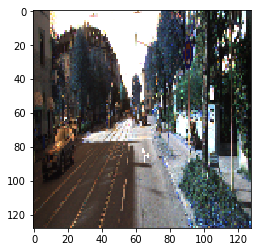

In [256]:
#Check the images
plt.imshow(X[1])


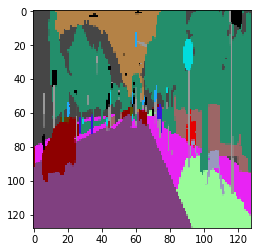

In [257]:
plt.imshow(y[1])

(375, 1242, 3)


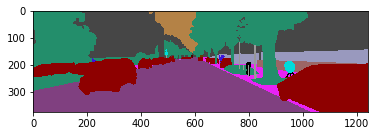

In [249]:
a = './training/semantic_rgb/000000_10.png'
img = cv2.imread(a, 1)
print(img.shape)
plt.imshow(img)

(128, 128, 3)


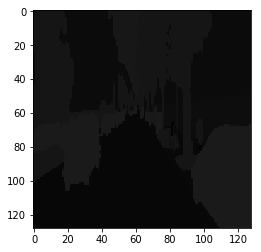

In [238]:
img = cv2.resize(img, (128, 128))
print(img.shape)
# img = img[:,:, :]
plt.imshow(img)

In [111]:
#Install segmentation models
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-wzvifu52
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-wzvifu52
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-_hwr5ox4/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [0]:
#Import libraries
from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

from keras.layers import Input, Conv2D
from keras.models import Model

In [0]:
from sklearn.model_selection import train_test_split

# Split train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2019)

In [0]:
BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

In [0]:
x_train = preprocess_input(X_train)
x_val = preprocess_input(X_valid)

In [262]:
x_val.shape

(30, 128, 128, 3)

In [263]:
x_train.shape

(170, 128, 128, 3)

In [265]:
#Build your model 

N = x_train.shape[-1]

base_model = Unet(backbone_name='inceptionv3', encoder_weights='imagenet')

inp = Input(shape=(128, 128, N))
l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
out = base_model(l1)
l2 = Conv2D(3, (1, 1))(out)
model = Model(inp, l2, name=base_model.name)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_475 (Conv2D)          (None, 128, 128, 3)       12        
_________________________________________________________________
u-inceptionv3 (Model)        multiple                  29933105  
_________________________________________________________________
conv2d_476 (Conv2D)          (None, 128, 128, 3)       6         
Total params: 29,933,123
Trainable params: 29,896,707
Non-trainable params: 36,416
_________________________________________________________________


In [266]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_381 (Conv2D)             (None, None, None, 3 864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, None, None, 3 96          conv2d_381[0][0]                 
__________________________________________________________________________________________________
activation_377 (Activation)     (None, None, None, 3 0           batch_normalization_377[0][0]    
__________________________________________________________________________________________________
conv2d_382

In [0]:
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy


In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [0]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [0]:
# compile model
model.compile('Adam', loss=loss, metrics=[dice_coefficient])

In [326]:
# fit model
model.fit(
    x=x_train,
    y=y_train,
    batch_size=10,    
    epochs=100,
    validation_data=(x_val, y_valid),
)

Train on 170 samples, validate on 30 samples
Epoch 1/100
170/170 [==============================] - 3s 15ms/step - loss: 1.3055 - dice_coefficient: 0.5380 - val_loss: 1.3167 - val_dice_coefficient: 0.5356
Epoch 2/100
170/170 [==============================] - 3s 15ms/step - loss: 1.3052 - dice_coefficient: 0.5380 - val_loss: 1.3163 - val_dice_coefficient: 0.5342
Epoch 3/100
170/170 [==============================] - 3s 15ms/step - loss: 1.3047 - dice_coefficient: 0.5379 - val_loss: 1.3173 - val_dice_coefficient: 0.5349
Epoch 4/100
170/170 [==============================] - 3s 15ms/step - loss: 1.3045 - dice_coefficient: 0.5381 - val_loss: 1.3175 - val_dice_coefficient: 0.5346
Epoch 5/100
170/170 [==============================] - 3s 15ms/step - loss: 1.3044 - dice_coefficient: 0.5382 - val_loss: 1.3162 - val_dice_coefficient: 0.5349
Epoch 6/100
170/170 [==============================] - 3s 15ms/step - loss: 1.3037 - dice_coefficient: 0.5385 - val_loss: 1.3154 - val_dice_coefficient: 0.

In [327]:
model.evaluate(x_val, y_valid, verbose=1)

30/30 [==============================] - 0s 4ms/step


[1.3125312328338623, 0.5400059223175049]

In [328]:
# Predict on train, val and test
preds_train = model.predict(x_train, verbose=1)
preds_val = model.predict(x_val, verbose=1)

import numpy as np

# Threshold predictions
# preds_train_t = (preds_train > 0.5).astype(np.uint8)
# preds_val_t = (preds_val > 0.5).astype(np.uint8)

30/30 [==============================] - 0s 2ms/step


In [329]:
preds_train[0].shape

(128, 128, 3)

In [330]:
#Save weights
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
import matplotlib.pyplot as plt

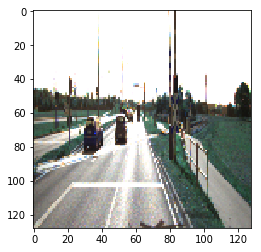

In [333]:
plt.imshow(x_train[2])

W0723 19:59:19.444928 140684545148800 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


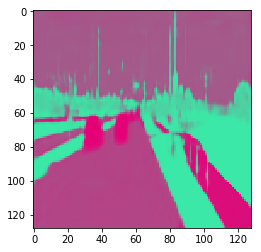

In [335]:
plt.imshow(preds_train[2])